In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('land_cover.csv')
df.head()

,location,classification,value,year
0,Sundarbans,122,38.007843,2015
1,Sundarbans,200,6.015686,2015
2,Sundarbans,112,13.733333,2015
3,Sundarbans,126,114.517647,2015
4,Sundarbans,90,59.933333,2015


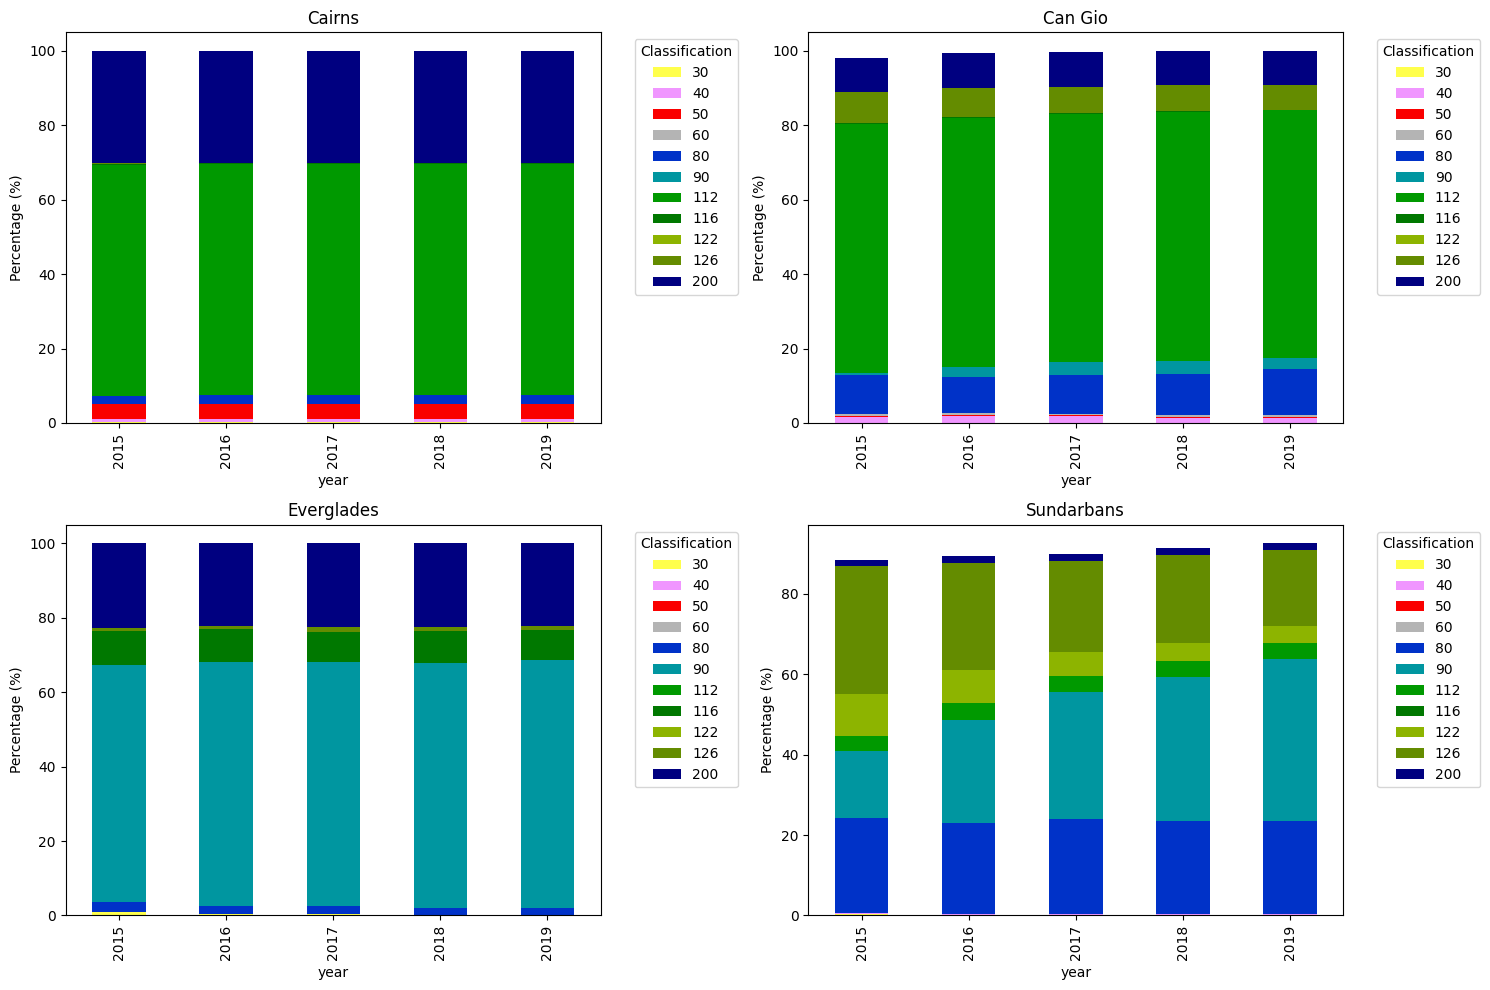

In [17]:
# Calculate the total pixel count for each location and year
total_pixels_per_location_year = df.groupby(['location', 'year'])['value'].sum().reset_index()

# Merge with the original dataset to get the total pixel count for each entry
merged_data = pd.merge(df, total_pixels_per_location_year, 
                       on=['location', 'year'], suffixes=('', '_total'))

# Calculate the percentage distribution of each classification for each location and year
merged_data['percentage'] = (merged_data['value'] / merged_data['value_total']) * 100

# Pivot the data for visualization
pivot_data = merged_data.pivot_table(index=['location', 'year'], 
                                    columns='classification', 
                                    values='percentage').reset_index()

# Plotting
plt.figure(figsize=(15, 10))
locations = pivot_data['location'].unique()

color_palette = {
    0: '#282828',   # Unknown
    20: '#ffbb22',  # Shrubs
    30: '#ffff4c',  # Herbaceous vegetation
    40: '#f096ff',  # Agriculture
    50: '#fa0000',  # Urban / built up
    60: '#b4b4b4',  # Bare / sparse vegetation
    70: '#f0f0f0',  # Snow and ice
    80: '#0032c8',  # Permanent water bodies
    90: '#0096a0',  # Herbaceous wetland
    100: '#fae6a0', # Moss and lichen
    111: '#58481f', # Closed forest, evergreen needle leaf
    112: '#009900', # Closed forest, evergreen broad leaf
    113: '#70663e', # Closed forest, deciduous needle leaf
    114: '#00cc00', # Closed forest, deciduous broad leaf
    115: '#4e751f', # Closed forest, mixed
    116: '#007800', # Closed forest, not defined
    121: '#666000', # Open forest, evergreen needle leaf
    122: '#8db400', # Open forest, evergreen broad leaf
    123: '#8d7400', # Open forest, deciduous needle leaf
    124: '#a0dc00', # Open forest, deciduous broad leaf
    125: '#929900', # Open forest, mixed
    126: '#648c00', # Open forest, not defined
    200: '#000080'  # Oceans, seas
}

for index, location in enumerate(locations, 1):
    plt.subplot(2, 2, index)
    location_data = pivot_data[pivot_data['location'] == location].set_index('year').iloc[:, 2:]
    location_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=[color_palette[col] for col in location_data.columns])
    plt.title(location)
    plt.ylabel('Percentage (%)')
    plt.legend(title="Classification", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()